In [1]:
from stereo3d import stereo_read_from_pickle as std_read
from parsivel import pars_read_from_pickle as pars_read
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from aux_funcs.general import hermitte_line_parsivel_classes
import numpy as np 
import seaborn as sns
parsivel_event_path = "/home/marcio/stage_project/data/saved_events/pasivel01.obj"
stereo_event_path = "/home/marcio/stage_project/data/saved_events/stereo3d01.obj"

Read the saved event from parsivel and Stereo 3D

In [2]:
stereo_event = std_read(stereo_event_path)
parsivel_event = pars_read(parsivel_event_path)

Convert Stereo series into a parsivel one

In [3]:
converted_event = stereo_event.convert_to_parsivel()

In [4]:
# Test the parsivel filter
filtered_event = converted_event.filter_by_parsivel_resolution()

In [12]:
from parsivel.matrix_classes import CLASSES_DIAMETER_MIDDLE
from stereo3d.convert_to_parsivel import find_velocity_class
from scipy.interpolate import CubicSpline
from aux_funcs.general import V_D_Lhermitte_1988

x = np.arange(1, 33, 1)
y = np.array(
    [
        find_velocity_class(V_D_Lhermitte_1988(diam))
        for diam in CLASSES_DIAMETER_MIDDLE
    ]
)
cs = CubicSpline(x, y)


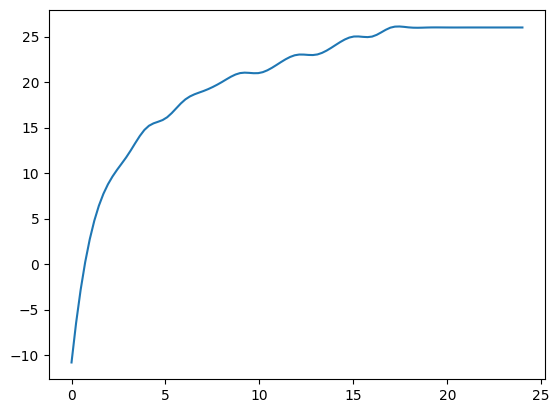

In [13]:
herm_line_x = np.linspace(0, 24, 100)
herm_line_y = cs(herm_line_x)
plt.plot(herm_line_x, herm_line_y)

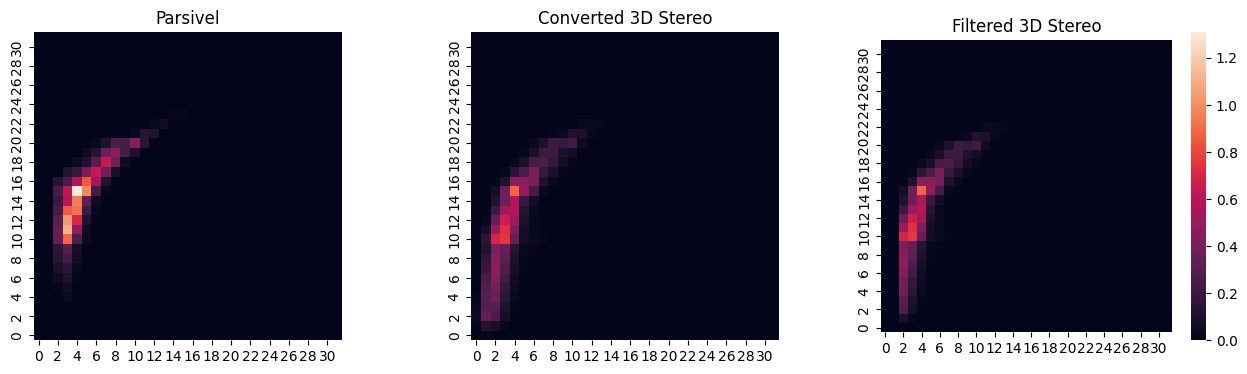

In [14]:
figure = plt.figure()
figure.set_size_inches((16,4))
plt_idx = 1

pars_matrix = parsivel_event.matrix_for_event / parsivel_event.area_of_study
converted_matrix = converted_event.matrix_for_event / converted_event.area_of_study
filtered_matrix = filtered_event.matrix_for_event / filtered_event.area_of_study

max_value = max((np.max(pars_matrix), np.max(filtered_matrix), np.max(converted_matrix)))

# Plot for the parsivel
ax = figure.add_subplot(1,3,plt_idx)
sns.heatmap(pars_matrix, square= True, ax=ax, cbar= False, vmax=max_value)
ax.set_title("Parsivel")
ax.invert_yaxis()
plt_idx += 1

# Plot for the 3d stereo
ax = figure.add_subplot(1,3,plt_idx)
sns.heatmap(converted_matrix, square= True, ax=ax, cbar= False, vmax=max_value)
ax.set_title("Converted 3D Stereo")
ax.invert_yaxis()
plt_idx += 1

# Plot for the filtered
ax = figure.add_subplot(1,3,plt_idx)
sns.heatmap(filtered_matrix, square= True, ax=ax, cbar= True, vmax=max_value)
ax.set_title("Filtered 3D Stereo")
ax.invert_yaxis()
plt_idx += 1